In [39]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle, Rectangle

import os

RESULTS_DIR = "RESULTSNOTRAP/r100tc-100aINTERg0.99"
print(os.path.abspath(RESULTS_DIR))
# RESULTS/RESULTSNOTRAP/r100tc-100aINTERg0.99/a0/J_0.pickle
#df = pd.read_csv("a0/df_0.csv")

AGENT_NUMBER = 30


agent_ids = [str(i) for i in range(0,AGENT_NUMBER)]

/home/paulina/Documents/github/InsectNavigation-RL/v2/forward/RESULTS/RESULTSNOTRAP/r100tc-100aINTERg0.99


Environment

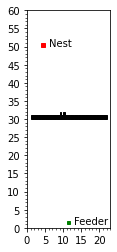

In [57]:
def centroid(data):
    x, y = zip(*data)
    l = len(x)
    return int(round(sum(x) / l)), int(round(sum(y) / l))

with open("../Wystrach2020/env.pickle", 'rb') as env_pickled:
    env = pickle.load(env_pickled)
env['goal'] = centroid(env.pop('goals'))
env

ax = plt.subplot()
ax.set_xlim(0,env["width"])
ax.set_ylim(0,env["height"])
ax.set_aspect('equal')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

#ax.grid(which='both')

traps = env["traps"]
trap_exits = env["trap_exits"]

patches = [
    Rectangle(env["goal"], width=1, height=1, color='red'),
    Rectangle(env["start"], width=1, height=1, color='green'),
    *(Rectangle(trap, width=1, height=1, color='black') for trap in traps),
    Rectangle(trap_exits[0][0], width=.5, height=2, color='black'),
    Rectangle(trap_exits[1][0], width=.5, height=2, color='black')
]

for patch in patches:
    ax.add_patch(patch)

ax.annotate('Feeder', (env['start'][0] + 2, env['start'][1]))
ax.annotate('Nest', (env['goal'][0] + 2, env['goal'][1]))
plt.savefig(f"{RESULTS_DIR}/environment.svg")


Calculate cumulative discounted rewards

Text(0.5, 1.0, 'No trap')

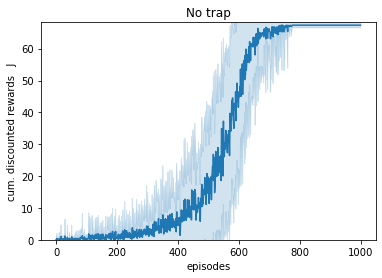

In [69]:
SMOOTHING_FACTOR = 1
plt.clf()

Js = []
for i in agent_ids:
  with open(f"{RESULTS_DIR}/a{i}/J_{i}.pickle",'rb') as f_in:
    Js.append(pickle.load(f_in))
Js_tupls = []
for J in Js:
  for idx, j in enumerate(J):
    Js_tupls.append((idx,j))
df_J = pd.DataFrame(Js_tupls, columns = ['x', 'y'])
# Smoothing by Factor
Js_tupls = []
N = SMOOTHING_FACTOR
for J in Js:
  J = np.convolve(J, np.ones(N)/N, mode='valid')
  for idx, j in enumerate(J):
    Js_tupls.append((idx,j))
df_J = pd.DataFrame(Js_tupls, columns = ['x', 'y'])
sns.lineplot(data=df_J, x="x", y="y", ci='sd')
ax = plt.gca()
ax.set_ylim(df_J.y.min(),df_J.y.max())
ax.set_xlabel('episodes')
ax.set_ylabel('cum. discounted rewards   J')
ax.set_title('No trap')
#plt.savefig(f"{RESULTS_DIR}/J.svg")

Episode Lengths

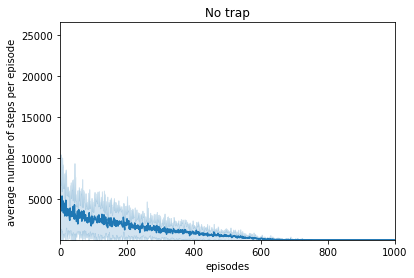

In [68]:
plt.clf()
SMOOTHING_FACTOR = 1

episode_lens = []
for i in agent_ids:
  with open(f"{RESULTS_DIR}/a{i}/episode_lens_{i}.pickle",'rb') as f_in:
    episode_lens.append(pickle.load(f_in))
episode_lens_tupls = []
for J in episode_lens:
  for idx, j in enumerate(J):
    episode_lens_tupls.append((idx,j))
df_J = pd.DataFrame(episode_lens_tupls, columns = ['x', 'y'])
# Smoothing by Factor
episode_lens_tupls = []
N = SMOOTHING_FACTOR
for J in episode_lens:
  J = np.convolve(J, np.ones(N)/N, mode='valid')
  for idx, j in enumerate(J):
    episode_lens_tupls.append((idx,j))
df_J = pd.DataFrame(episode_lens_tupls, columns = ['x', 'y'])
sns.lineplot(data=df_J, x="x", y="y", ci='sd')
ax = plt.gca()
ax.set_ylim(df_J.y.min(),df_J.y.max())
ax.set_xlim(0, 1000)
ax.set_xlabel('episodes')
ax.set_ylabel('average number of steps per episode')
ax.set_title('No trap')
plt.yscale('linear')
#plt.savefig(f"{RESULTS_DIR}/episode_lens.svg")

Trajectories

In [72]:
plt.clf()

trajectories = []
for i in [0]:#agent_ids:
    df = pd.read_csv(f"{RESULTS_DIR}/a{i}/df_{i}.csv")
    df = df[df.trial_nb == df.trial_nb.max()]


,Unnamed: 0,trial_nb,state,action,reward,next_state,path_x,path_y,path_x_next,path_y_next
873620,0,999,71,1,0.0,72,1,11,1,12
873621,1,999,72,5,0.0,13,1,12,0,13
873622,2,999,13,7,0.0,74,0,13,1,14
873623,3,999,74,1,0.0,75,1,14,1,15
873624,4,999,75,1,0.0,76,1,15,1,16
873625,5,999,76,7,0.0,137,1,16,2,17
873626,6,999,137,7,0.0,198,2,17,3,18
873627,7,999,198,7,0.0,259,3,18,4,19
873628,8,999,259,7,0.0,320,4,19,5,20
873629,9,999,320,7,0.0,381,5,20,6,21


<Figure size 432x288 with 0 Axes>